In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [6]:
reeses = cv2.imread('/home/wanakin/DATA/reeses_puffs.png',0)

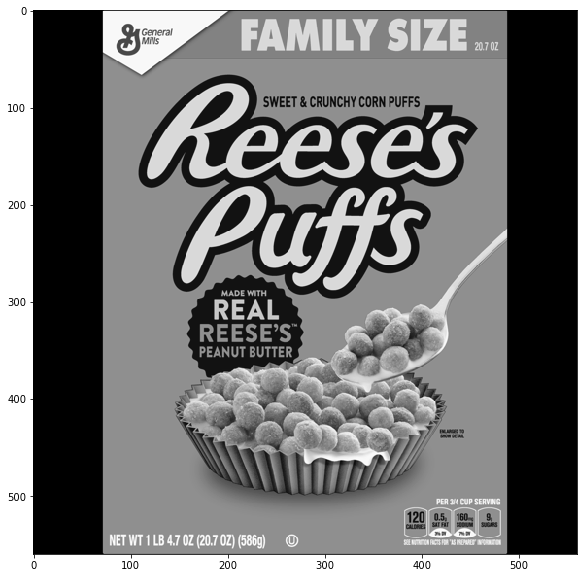

In [7]:
display(reeses)

In [8]:
cereals = cv2.imread('/home/wanakin/DATA/many_cereals.jpg',0)

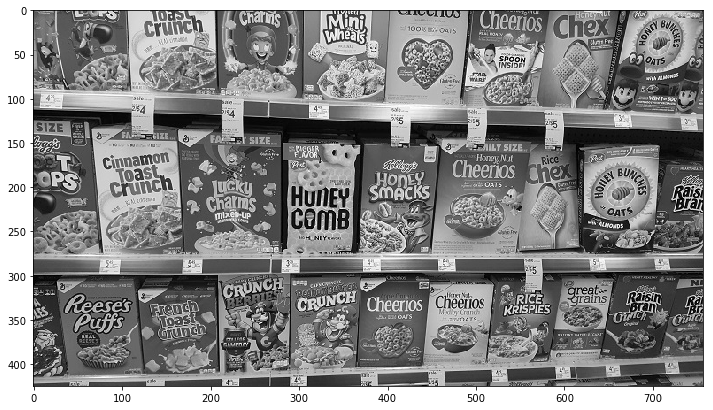

In [9]:
display(cereals)

In [10]:
orb = cv2.ORB_create()

In [11]:
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

In [12]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [13]:
matches = bf.match(des1,des2)

In [14]:
matches = sorted(matches,key=lambda x:x.distance)

In [15]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[0:25],None,flags=2)

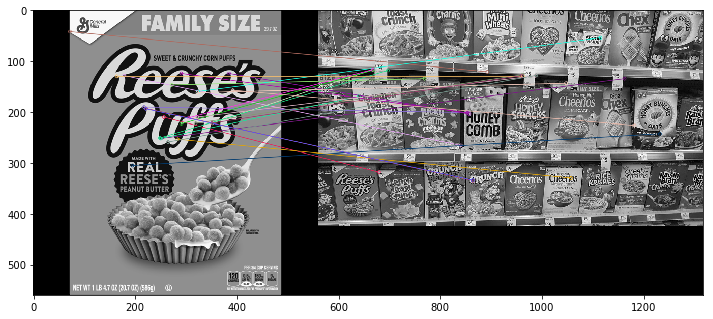

In [16]:
display(reeses_matches)

In [17]:
sift = cv2.xfeatures2d.SIFT_create()

In [19]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [20]:
bf = cv2.BFMatcher()

In [21]:
matches = bf.knnMatch(des1,des2,k=2)

In [23]:
#matches

In [43]:
good = []
# ratio match < 75% match2
#less distance == better match
for match1,match2 in matches:
    # IF MATCH1 DISTANCE IS LESS THAN 75% OF MATCH2 DISTANCE
    # THEN DESCRIPTOR WAS A GOOD MATCH, LETS KEEP IT
    if match1.distance <0.75*match2.distance:
        good.append([match1])

In [44]:
len(good)

79

In [45]:
len(matches)

1501

In [46]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

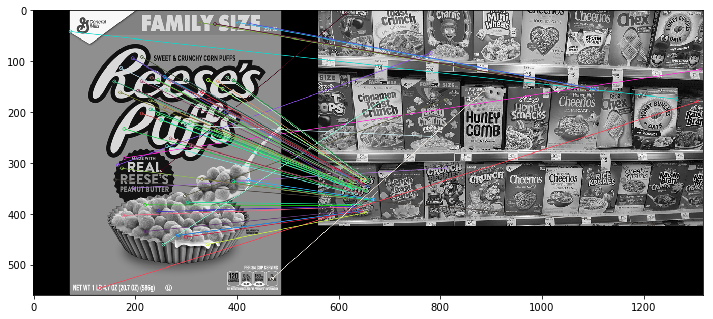

In [47]:
display(sift_matches)

In [63]:
sift = cv2.xfeatures2d.SIFT_create()

In [64]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [90]:
# FLANN -- fast library for aproximated near neighbours -- it's so much faster but isn't going to find the best matches
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)

In [85]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [86]:
matches = flann.knnMatch(des1,des2,k=2)

In [87]:
good = []
for match1,match2 in matches:
    if match1.distance < 0.7 * match2.distance:
        good.append([match1])

In [88]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=0)

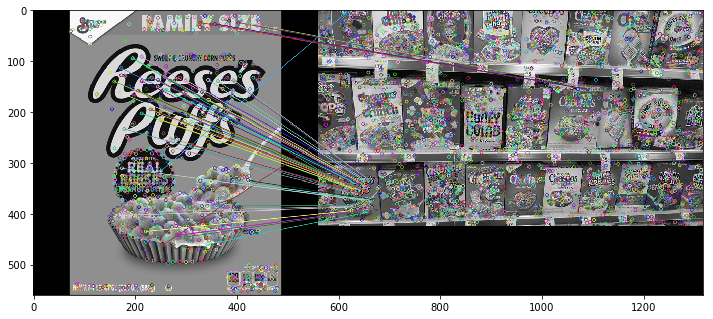

In [89]:
display(flann_matches)